1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training loop
    - forward pass: compute prediction and loss
    - backward pass: gradients
    - update weights

epoch: 10, loss: 4376.9067
epoch: 20, loss: 3265.0774
epoch: 30, loss: 2460.8340
epoch: 40, loss: 1878.4508
epoch: 50, loss: 1456.2996
epoch: 60, loss: 1150.0107
epoch: 70, loss: 927.5937
epoch: 80, loss: 765.9528
epoch: 90, loss: 648.3957
epoch: 100, loss: 562.8420


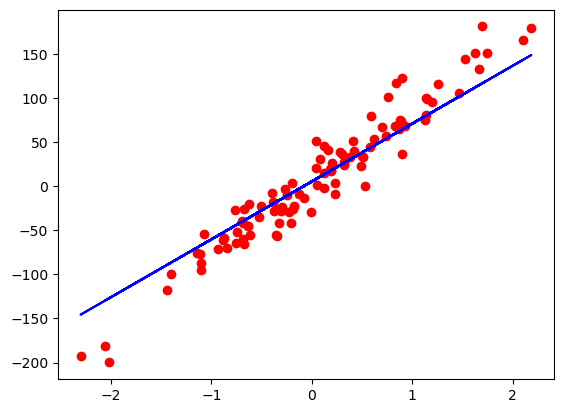

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rete = 0.01                                                   # learning rate
criterion = nn.MSELoss()                                               # loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rete)      # optimizer

# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()

    # erase gradients
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss: {loss.item():.4f}")

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()